In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ab-testing/ab_testing.xlsx


In [2]:
df_c = pd.read_excel('/kaggle/input/ab-testing/ab_testing.xlsx', sheet_name = 'Control Group')
df_t = pd.read_excel('/kaggle/input/ab-testing/ab_testing.xlsx', sheet_name = 'Test Group')
df_c['Group'] = 'Control'
df_t['Group'] = 'Test'

In [3]:
df_c.head()

,Impression,Click,Purchase,Earning,Group
0,82529.459271,6090.077317,665.211255,2311.277143,Control
1,98050.451926,3382.861786,315.084895,1742.806855,Control
2,82696.023549,4167.965750,458.083738,1797.827447,Control
3,109914.400398,4910.882240,487.090773,1696.229178,Control
4,108457.762630,5987.655811,441.034050,1543.720179,Control


In [4]:
df = pd.concat([df_c, df_t])

In [5]:
df.head()

,Impression,Click,Purchase,Earning,Group
0,82529.459271,6090.077317,665.211255,2311.277143,Control
1,98050.451926,3382.861786,315.084895,1742.806855,Control
2,82696.023549,4167.965750,458.083738,1797.827447,Control
3,109914.400398,4910.882240,487.090773,1696.229178,Control
4,108457.762630,5987.655811,441.034050,1543.720179,Control


H0 : M1 = M2 ------- Kontrol ve test gruplarının **Purchase** değişkeninlerinin dağılımları arasında anlamlı bir fark **yoktur**.

H1 : M1!= M2 ------- Kontrol ve test gruplarının **Purchase** değişkeninlerinin dağılımları arasında anlamlı bir fark **vardır**.

In [6]:
print(df[df['Group'] == 'Control']['Purchase'].mean(), df[df['Group'] == 'Test']['Purchase'].mean())

550.8940587702316 582.1060966484677


<Axes: xlabel='Group', ylabel='Purchase'>

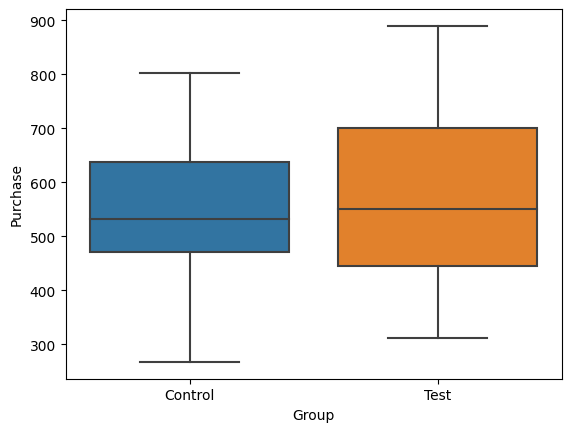

In [7]:
import seaborn as sns
sns.boxplot(data=df, y = 'Purchase', x='Group')

## Varsayım Kontrolleri

### Shapiro-Wilk Normal dağılıma uygunluk Testi

H0 : M = N(x, s) ------- Kontrol ve test gruplarının **Purchase** değişkeninlerinin dağılımları normal dağılıma **uygundur**.

H1 : M != N(x, s) ------ Kontrol ve test gruplarının **Purchase** değişkeninlerinin dağılımları normal dağılıma **uygun değildir**.

In [8]:
from scipy import stats
test_norm = stats.shapiro(df[df['Group'] == 'Test']['Purchase'])
control_norm = stats.shapiro(df[df['Group'] == 'Control']['Purchase'])

In [9]:
control_norm.pvalue

0.5891071186294093

In [10]:
test_norm.pvalue

0.15413405050730578

Her iki grubun dağılımı da normal dağılıma uygundur (p > 0.05)

### Levene Varyans Homojenliği Testi

H0 : s1^2 = s2^2 ------- Kontrol ve test gruplarının **Purchase** değişkeninlerinin dağılımlarının varyansları birbirine **eşittir**.

H1 : s1^2 != s2^2 ------ Kontrol ve test gruplarının **Purchase** değişkeninlerinin dağılımlarının varyansları birbirine **eşit değildir**.

In [11]:
levene_test = stats.levene(df[df['Group'] == 'Test']['Purchase'], df[df['Group'] == 'Control']['Purchase'])

In [12]:
levene_test.pvalue

0.10828588271874791

Varyans homojenliği varsayımı da sağlanır (p > 0.05). İki grup için parametrik yöntemler uygulanabilir.

## Independent Samples T-Test

Hipotezleri Hatırlayalım:

H0 : M1 = M2 ------- Kontrol ve test gruplarının **Purchase** değişkeninlerinin dağılımları arasında anlamlı bir fark **yoktur**.

H1 : M1!= M2 ------- Kontrol ve test gruplarının **Purchase** değişkeninlerinin dağılımları arasında anlamlı bir fark **vardır**.

In [13]:
t_statistic, p_value = stats.ttest_ind(df[df['Group'] == 'Test']['Purchase'], df[df['Group'] == 'Control']['Purchase'])

In [14]:
p_value

0.34932579202108416

H0 hipotezi reddedilemez, Kontrol ve test gruplarının **Purchase** değişkeninlerinin dağılımları arasında anlamlı bir fark **yoktur** (p > 0.05).

averagebidding'in, maximumbidding'den daha fazla dönüşüm getdiği söylenemez.